In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:\\Users\\Al-arab\\Desktop\\softcode\\third task\\IRIS.csv") # Read the dataset
df.head() #Main columns are: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species
df.info() #NO NANs #Good types of data
intercept = 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df["species"].unique() # Main 3 types of species
Iris_setosa = df[df["species"] == "Iris-setosa"] # Data with species Iris-setosa
Iris_versicolor = df[df["species"] == "Iris-versicolor"] # Data with species Iris-versicolor
Iris_virginica = df[df["species"] == "Iris-virginica"] # Data with species Iris-virginica

In [4]:
# Let's make some null hypothesis about the data
#--------------------------------------------------------------
# 1. The length of the petal is greater than the width of the petal
# 2. The length of the sepal is greater than the width of the sepal
# 3. The length of the petal is greater than the length of the sepal
# 4. The width of the petal is greater than the width of the sepal
#--------------------------------------------------------------
# 5. The average length of the sepal in Iris-setosa is greater than average length of the sepal in Iris-versicolor
# 6. The average length of the petal in Iris-setosa is greater than average length of the petal in Iris-virginica

## EDA sepal properties

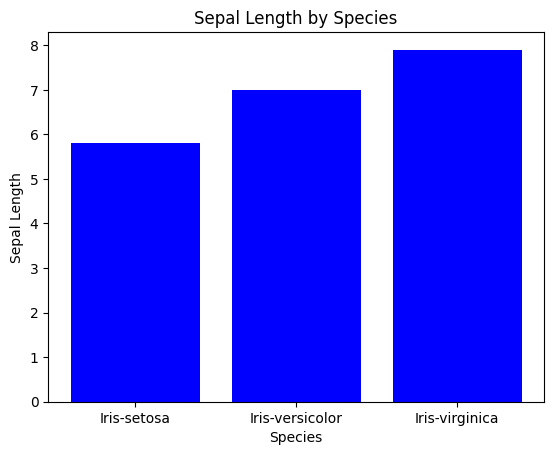

In [5]:
plt.bar(df["species"], df["sepal_length"], color="blue")
plt.title("Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()
# From our data we can see that the biggest average length of the sepal is iris virginica


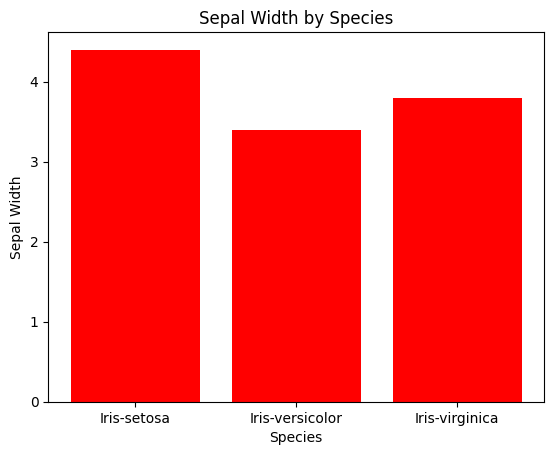

In [6]:
plt.bar(df["species"], df["sepal_width"], color="red")
plt.title("Sepal Width by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")
plt.show()
# From our data we can see that the biggest average width of the sepal is iris setosa


## EDA petal properties

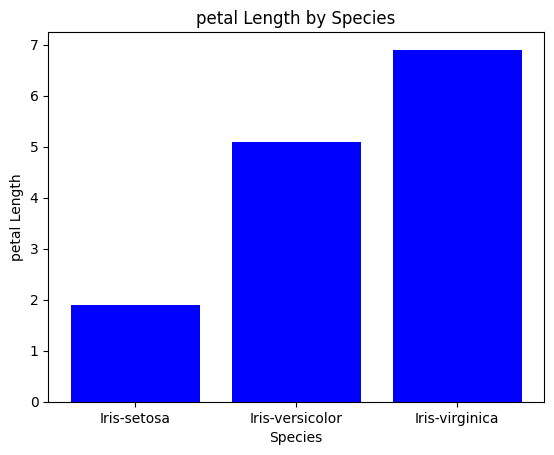

In [7]:
plt.bar(df["species"], df["petal_length"], color="blue")
plt.title("petal Length by Species")
plt.xlabel("Species")
plt.ylabel("petal Length")
plt.show()
# From our data we can see that the biggest average length of the petal is iris virginica

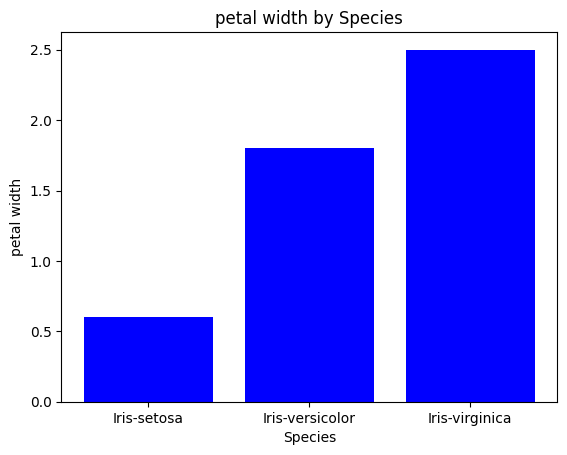

In [8]:
plt.bar(df["species"], df["petal_width"], color="blue")
plt.title("petal width by Species")
plt.xlabel("Species")
plt.ylabel("petal width")
plt.show()
# From our data we can see that the biggest average length of the petal is iris virginica


## Hypothesis

####
$H_{0}: p_{length} - p_{width} >= 0$

$H_{1}:  p_{length} - p_{width} < 0$

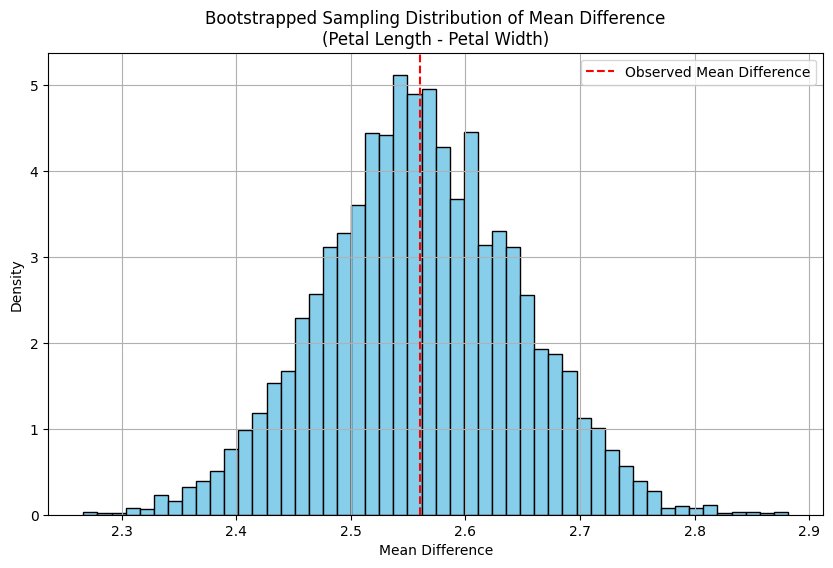

In [9]:
axv = (df["petal_length"] - df["petal_width"]).mean()
boot_means = []
for _ in range(5000):
    sample = df.sample(n=150, replace=True)
    mean_diff = (sample['petal_length'] - sample['petal_width']).mean()
    boot_means.append(mean_diff)
boot_means = np.array(boot_means)

boot_means = np.array(boot_means)

plt.figure(figsize=(10, 6))
plt.hist(boot_means, bins=50, color="skyblue", edgecolor="black", density=True)
plt.axvline(x=axv, color="red", linestyle="--", label="Observed Mean Difference")
plt.title("Bootstrapped Sampling Distribution of Mean Difference\n(Petal Length - Petal Width)")
plt.xlabel("Mean Difference")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
(axv >= boot_means).mean() 
# we have two ways either we can use the p-value Making sure that the p-value is less than 0.05 or we can use the confidence interval method
# since the p-value is greater than 0.05 we fail to reject the null hypothesis
#--------------------------------------------------------------

0.5074

$p_{length} >=  p_{width}$ is our conclusion

####
$H_{0}: p_{Irispetal length} - p_{width} >= 0$

$H_{1}:  p_{length} - p_{width} < 0$

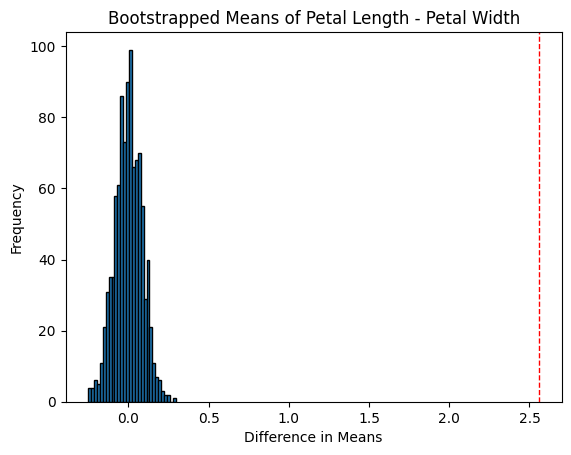

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [11]:
plt.hist(np.random.normal(0, boot_means.std(), 1000),bins=30, edgecolor='black');
plt.axvline(axv, color='red', linestyle='dashed', linewidth=1)
plt.title("Bootstrapped Means of Petal Length - Petal Width")
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(10, 6))


## Regression

In [12]:
df["speciesmapped"] = df["species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
le = LabelEncoder()
df["speciesmapped"] = le.fit_transform(df["species"])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1   sepal_width    150 non-null    float64
 2   petal_length   150 non-null    float64
 3   petal_width    150 non-null    float64
 4   species        150 non-null    object 
 5   speciesmapped  150 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [14]:
x = df.drop(columns=["species", "speciesmapped"])
y = df["speciesmapped"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["setosa", "versicolor", "virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Species	Sepal Length (cm)	Sepal Width (cm) |	Petal Length (cm)	Petal Width (cm)
Iris-setosa	    5.1	             3.5	     |        1.4	             0.2
Iris-versicolor	7.0	             3.2	     |        4.7	             1.4
Iris-virginica	6.3	             3.3	     |        5.0	             1.5

In [15]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    new_sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    pred_class = model.predict(new_sample)[0]
    pred_name = le.inverse_transform([pred_class])[0]

    # Predict probabilities
    probs = model.predict_proba(new_sample)[0]
    print(f"Predicted species: {pred_name}")
    print(f"Predicted probabilities: {probs}")

In [16]:
predict_species(5.1, 3.5, 1.4, 0.2)

Predicted species: Iris-setosa
Predicted probabilities: [9.76906808e-01 2.30931432e-02 4.85184976e-08]


C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [17]:
predict_species(7.0,3.2,4.7,1.4)

Predicted species: Iris-versicolor
Predicted probabilities: [0.00266128 0.85908059 0.13825813]


C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [18]:
predict_species(6.3 ,3.3, 5.0 ,1.5) # I think this is virginica and this problem comes from the data raws are not enough

Predicted species: Iris-versicolor
Predicted probabilities: [0.00195907 0.58239469 0.41564624]


C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
